In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [2]:
july_trips = pd.read_csv('../data/july_trip.csv')
july_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [3]:
july_trips.companyName.unique()

array(['Bird', 'Lyft', 'Bolt Mobility', 'SPIN', 'Lime', 'Gotcha', 'JUMP'],
      dtype=object)

In [4]:
company_dict = {'Bird':0, 'Lyft': 1, 'Bolt Mobility': 2, 'SPIN': 3, 'Lime': 4, 'Gotcha': 5, 'JUMP': 6}

In [5]:
july_trips.companyName = july_trips.companyName.replace(company_dict)

In [6]:
july_trips.pubTimeStamp = pd.to_datetime(july_trips.pubTimeStamp)
july_trips.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213,0,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213,0,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000


In [7]:
july_trips_scooters = july_trips[['pubTimeStamp','tripRecordNum','tripRoute', 'sumdID', 'tripDuration', 'tripDistance']]

In [8]:
july_trips_scooters.to_pickle("../data/july_trips.pkl")

In [40]:
july_trips_pkl = pd.read_pickle("../data/july_trips.pkl")
july_trips_pkl.head(5)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance
0,2019-07-01 00:02:52.213,BRD5179,"[[36.177438,-86.751861],[36.177425,-86.751987]...",PoweredZSHKJ,2.0,0.0
1,2019-07-01 00:02:52.213,BRD5177,"[[36.162718,-86.771102],[36.162718,-86.771102]]",Powered22JF6,0.0,0.0
2,2019-07-01 00:02:52.213,BRD5176,"[[36.162734,-86.77122],[36.162706,-86.771325],...",Powered22JF6,1.0,0.0
3,2019-07-01 00:02:52.213,BRD5178,"[[36.152499,-86.798708]]",PoweredIB2CC,1.0,0.0
4,2019-07-01 00:02:52.213,BRD5180,"[[36.157523,-86.775794]]",PoweredW4G7R,2.0,0.0


##### Statistics is decision making in the face of uncertainty or variablity

 - GOAL: can we understand the metrics that explain what is the ideal density of available scooters?

### Common descriptive statistics
 - measures of central tendency (mean, median, mode)
 - measures of variability (standard deviation, variance)
 - distribution metrics (quartiles, interquartile range, outliers)

In [10]:
july_trips_pkl['tripDuration'].value_counts()

4.000000     6423
5.000000     6168
3.000000     5900
6.000000     5830
7.000000     5091
             ... 
18.263950       1
55.839800       1
7.425817        1
13.871150       1
27.563217       1
Name: tripDuration, Length: 35772, dtype: int64

In [11]:
july_trips_pkl.describe()

,tripDuration,tripDistance
count,134926.000000,1.349260e+05
mean,97.097264,5.333994e+03
std,1722.548585,1.406051e+05
min,-19.358267,-2.032480e+07
25%,5.000000,3.280840e+02
50%,10.148442,2.956037e+03
75%,21.250550,6.916011e+03
max,512619.000000,3.188448e+07


  What is the mean for `tripDuration` and `tripDistance` ?
 

In [12]:
july_trips_pkl.isnull().sum()

pubTimeStamp     0
tripRecordNum    0
tripRoute        0
sumdID           0
tripDuration     0
tripDistance     0
dtype: int64

In [22]:
scooter_name = july_trips_pkl.tripRecordNum.unique()

In [23]:
scoot_name = pd.DataFrame(july_trips_pkl, columns = ['tripRecordNum', 'tripDuration', 'tripDistance'])
print(scoot_name)

       tripRecordNum  tripDuration  tripDistance
0            BRD5179      2.000000           0.0
1            BRD5177      0.000000           0.0
2            BRD5176      1.000000           0.0
3            BRD5178      1.000000           0.0
4            BRD5180      2.000000           0.0
...              ...           ...           ...
134921          JMP3     17.497950        7075.2
134922          JMP2      3.154917        1320.0
134923          JMP1     18.440650        7920.0
134924         JMP35    142.345610       20433.6
134925         JMP34    209.409650       14889.6

[134926 rows x 3 columns]


In [39]:
Bird = scoot_name[scoot_name['tripRecordNum'].str.contains('BRD')]
Bird.head()

,tripRecordNum,tripDuration,tripDistance
0,BRD5179,2.0,0.0
1,BRD5177,0.0,0.0
2,BRD5176,1.0,0.0
3,BRD5178,1.0,0.0
4,BRD5180,2.0,0.0


In [29]:
Lyft = scoot_name[scoot_name['tripRecordNum'].str.contains('LFT')]
Lyft.head()

,tripRecordNum,tripDuration,tripDistance
5,LFT7,3.716183,2375.32816
10,LFT11,6.297550,5488.84532
11,LFT12,6.776617,5383.85844
12,LFT15,7.443667,4379.92140
13,LFT16,1.487350,104.98688


In [31]:
Lime = scoot_name[scoot_name['tripRecordNum'].str.contains('LIM')]
Lime.head()

,tripRecordNum,tripDuration,tripDistance
227,LIM784824,2.0,782.872780
228,LIM784825,1.0,413.195448
229,LIM784829,4.0,3545.810316
230,LIM784835,5.0,3302.785000
231,LIM784837,1.0,31.924046


In [32]:
Jump = scoot_name[scoot_name['tripRecordNum'].str.contains('JMP')]
Jump.head()

,tripRecordNum,tripDuration,tripDistance
2994,JMP64,21.434584,12249.6
2995,JMP68,21.616800,9979.2
2996,JMP55,828.387000,8236.8
2997,JMP63,10.221517,4752.0
2998,JMP62,10.497383,4752.0


In [33]:
Spin= scoot_name[scoot_name['tripRecordNum'].str.contains('SPI')]
Spin.head()

,tripRecordNum,tripDuration,tripDistance
74,SPI12,3.0,131.23360
75,SPI11,8.0,4366.79804
76,SPI10,8.0,4507.87416
100,SPI9,10.0,3720.47256
125,SPI19,4.0,236.22048


In [36]:
Bolt = scoot_name[scoot_name['tripRecordNum'].str.contains('BOL')]
Bolt.head()

,tripRecordNum,tripDuration,tripDistance
56,BOL00005,391.0,2221.13
57,BOL00004,395.0,2162.07
101,BOL00008,372.0,2568.90
142,BOL00010,597.0,4320.87
163,BOL00015,325.0,1633.86


In [37]:
Gotcha = scoot_name[scoot_name['tripRecordNum'].str.contains('GOT')]
Gotcha.head()

,tripRecordNum,tripDuration,tripDistance
2202,GOT11,2.183333,420.964580
2234,GOT12,7.966667,26340.650449
2877,GOT13,3.150000,11.191175
11847,GOT1,15.000000,1228.809094
11880,GOT2,5.000000,1491.154903


In [52]:
Jump.max()
Lyft.max()
Bolt.max()
Gotcha.max()
Spin.describe()

,tripDuration,tripDistance
count,11685.000000,11685.000000
mean,21.185537,2775.959577
std,43.450700,2887.430660
min,2.000000,0.000000
25%,7.000000,777.559080
50%,13.000000,2034.120800
75%,24.000000,3772.966000
max,2005.000000,66207.351200


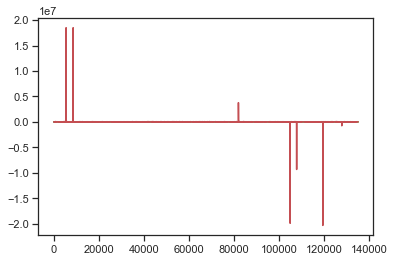

In [100]:
Lyft.tripDuration.plot();Lyft.tripDistance.plot();Bird.tripDuration.plot();Bird.tripDistance.plot();

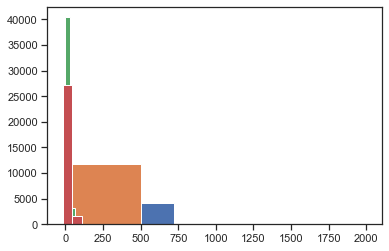

In [93]:
plt.hist('tripDuration', bins = 2, data = Jump);
plt.hist('tripDuration', bins = 4, data = Spin);
plt.hist('tripDuration', bins = 6, data = Bird);
plt.hist('tripDuration', bins = 8, data = Lyft);

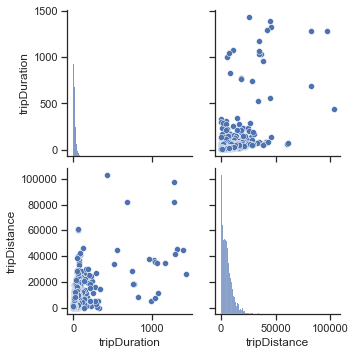

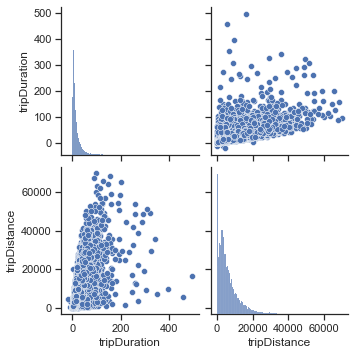

In [85]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(Jump);sns.pairplot(Lyft);

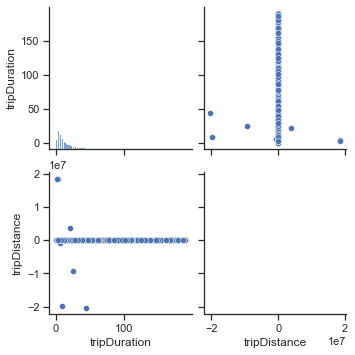

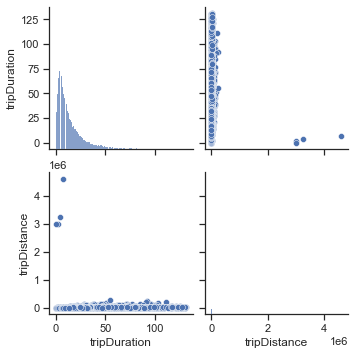

In [86]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal

sns.pairplot(Bird);sns.pairplot(Lime);

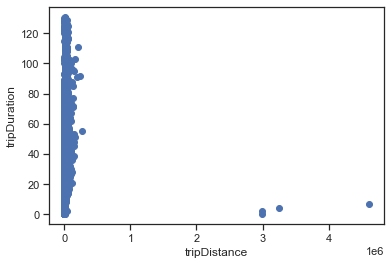

In [94]:
plt.scatter('tripDistance', 'tripDuration', data = Lime)
plt.xlabel('tripDistance')
plt.ylabel('tripDuration');

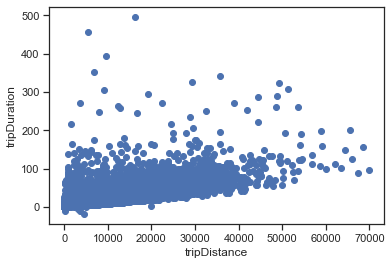

In [95]:
plt.scatter('tripDistance', 'tripDuration', data = Lyft)
plt.xlabel('tripDistance')
plt.ylabel('tripDuration');

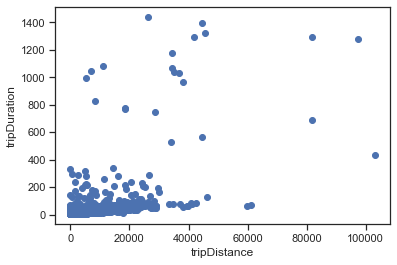

In [96]:
plt.scatter('tripDistance', 'tripDuration', data = Jump)
plt.xlabel('tripDistance')
plt.ylabel('tripDuration');

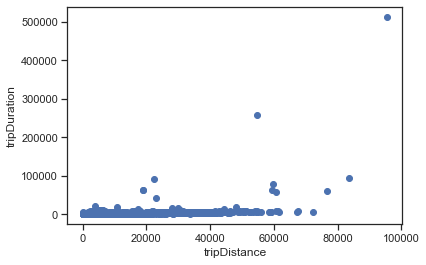

In [97]:
plt.scatter('tripDistance', 'tripDuration', data = Bolt)
plt.xlabel('tripDistance')
plt.ylabel('tripDuration');

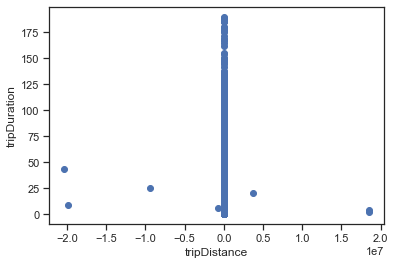

In [98]:
plt.scatter('tripDistance', 'tripDuration', data = Bird)
plt.xlabel('tripDistance')
plt.ylabel('tripDuration');

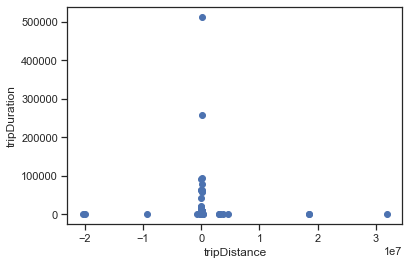

In [101]:
plt.scatter('tripDistance', 'tripDuration', data = july_trips_pkl)
plt.xlabel('tripDistance')
plt.ylabel('tripDuration');